## 鸡兔同笼问题

目的 ： 构建一个包含两个参数的神经网络使之能够从鸡和兔总数Z和总的脚数J求得鸡的数量C。


$C=a*Z+b*J$

生成训练用的数据集

In [9]:
import random
数据单元={}
训练集=[]
for i in range(100000):
    鸡数=random.randint(0,10000)
    兔数=random.randint(0,10000)
    总只数=鸡数+兔数
    总脚数=2*鸡数+4*兔数
    数据单元['鸡数']=鸡数
    数据单元['兔数']=兔数
    数据单元['总只数']=总只数
    数据单元['总脚数']=总脚数
    训练集.append(数据单元.copy())



构建神经网络

In [34]:
#构建神经网络
class 求鸡的数量():

    def __init__(self):
        # 初始化网络参数
        self.a= random.random()
        self.b= random.random()
    def forward(self,Z,J):
        
        C=self.a*Z+self.b*J
        return C
# 实例化一个神经网络
预测鸡数=求鸡的数量()
学习率=1

训练

$loss=(a*Z+b*J-鸡_实)^2$

In [35]:
for i in range(100000):
    #取出一组数据
    #并归一化
    鸡数=训练集[i]['鸡数']
    Z=训练集[i]['总只数']/60000
    J=训练集[i]['总脚数']/60000

    鸡数_预=预测鸡数.forward(Z,J)

    #损失函数
    #print(鸡数_预,鸡数)
    loss=(鸡数_预-鸡数)**2
    #损失函数对a求导
    loss_a=2*Z*(鸡数_预-鸡数)
    #损失函数对b求导
    loss_b=2*J*(鸡数_预-鸡数) 
    
    #反向传播
    预测鸡数.a=预测鸡数.a-学习率*loss_a
    预测鸡数.b=预测鸡数.b-学习率*loss_b
loss    

1.3234889800848443e-23

In [26]:
import random
数据单元={}
验证集=[]
for i in range(1000):
    鸡数=random.randint(1,20000)
    兔数=random.randint(1,20000)
    总只数=鸡数+兔数
    总脚数=2*鸡数+4*兔数
    数据单元['鸡数']=鸡数
    数据单元['兔数']=兔数
    数据单元['总只数']=总只数
    数据单元['总脚数']=总脚数
    验证集.append(数据单元.copy())



In [31]:
正确数=0
for i in range(1000):
    #取出一组数据
    #并归一化
    鸡数=验证集[i]['鸡数']
    总只数=验证集[i]['总只数']/60000
    总脚数=验证集[i]['总脚数']/60000

    鸡数_预=预测鸡数.forward(总只数,总脚数)
    鸡数_预=round(鸡数_预)
    #print(鸡数_预,鸡数)
    if 鸡数_预==鸡数:
        正确数+=1
print('1000个测试数据正确{}个'.format(正确数))
     

1000个测试数据正确1000个



### 需要注意！
归一化：之所以要对输入数据归一化是为了避免导数过大而无法收敛

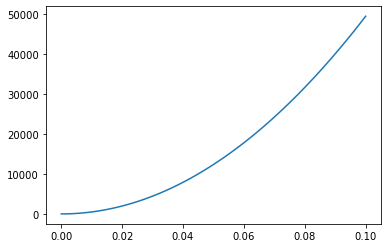

In [110]:
import matplotlib.pyplot as plt
import numpy as np
x = range(100)

x = np.linspace(0, 0.1, 100)
输入数据=2222
y = [(输入数据*val)**2 for val in x]

plt.plot(x,y)

如图所示输入函数过大时x微小的变化会导致函数值激增